### erddapy example for PMEL tools - Drifters and Alamo Floats (2018)

__pyversion__==3.7   
__author__==S.Bell

Packages needed: ***all are available via conda***
- matplotlib
- cartopy
- pygmt
- cmoceans
- erddapy
- standard packages like numpy,pandas,etc

### connecting and basic information

In [11]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import datetime

server_url='http://akutan.pmel.noaa.gov:8080/erddap'
e = ERDDAP(server=server_url)

Get only ARGOS Drifter datafiles

In [12]:
df_d = pd.read_csv(e.get_search_url(response='csv', search_for='drifter'))

In [13]:
drifter = df_d['Dataset ID'].values
print(drifter)

['2015_Argos_Drifters_NRT' '2016_Argos_Drifters_NRT'
 '2017_Argos_Drifters_NRT' '2018_Argos_Drifters_NRT'
 '2019_Argos_Drifters_NRT' '2020_Argos_Drifters_NRT']


In [14]:
kw = {
    'standard_name': 'sea_water_temperature',
    'min_lon': -360,
    'max_lon': 540,
    'min_lat': 50.0,
    'max_lat': 90.0,
    'min_time': '2019-01-10T00:00:00Z',
    'max_time': '2020-01-10T00:00:00Z'
}

constraints = {
    'longitude>=': kw['min_lon'],
    'longitude<=': kw['max_lon'],
    'latitude>=': kw['min_lat'],
    'latitude<=': kw['max_lat'],
    'time>=': kw['min_time'],
    'time<=': kw['max_time'],
}

In [15]:
variables_2 = [e.get_var_by_attr(dataset_id=drifterid, long_name=lambda v: v is not None) for drifterid in drifter]

In [16]:
common_variables_2 = set(variables_2[0]).intersection(*variables_2[1:])

common_variables_2.update(['trajectory_id']) 


In [17]:
from requests.exceptions import HTTPError

dfs_2 = {}
for arfloat in drifter:
    print(arfloat)
    try:
        e = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        e.dataset_id=arfloat
    except HTTPError:
        print('Failed to generate url {}'.format(alamo))
        continue
    try:
        df = e.to_pandas(
            index_col='time (UTC)',
            parse_dates=True,
            skiprows=(1,)  # units information can be dropped.
       ).dropna()
        
        df.sort_index(inplace=True)
        df.columns = [x[1].split()[0] for x in enumerate(df.columns)]

        dfs_2.update({arfloat: df})
    except:
        print("error")
        pass

2015_Argos_Drifters_NRT
2016_Argos_Drifters_NRT
2017_Argos_Drifters_NRT
2018_Argos_Drifters_NRT
2019_Argos_Drifters_NRT
2020_Argos_Drifters_NRT


2015_Argos_Drifters_NRT
2016_Argos_Drifters_NRT
2017_Argos_Drifters_NRT
2018_Argos_Drifters_NRT
2019_Argos_Drifters_NRT
2020_Argos_Drifters_NRT


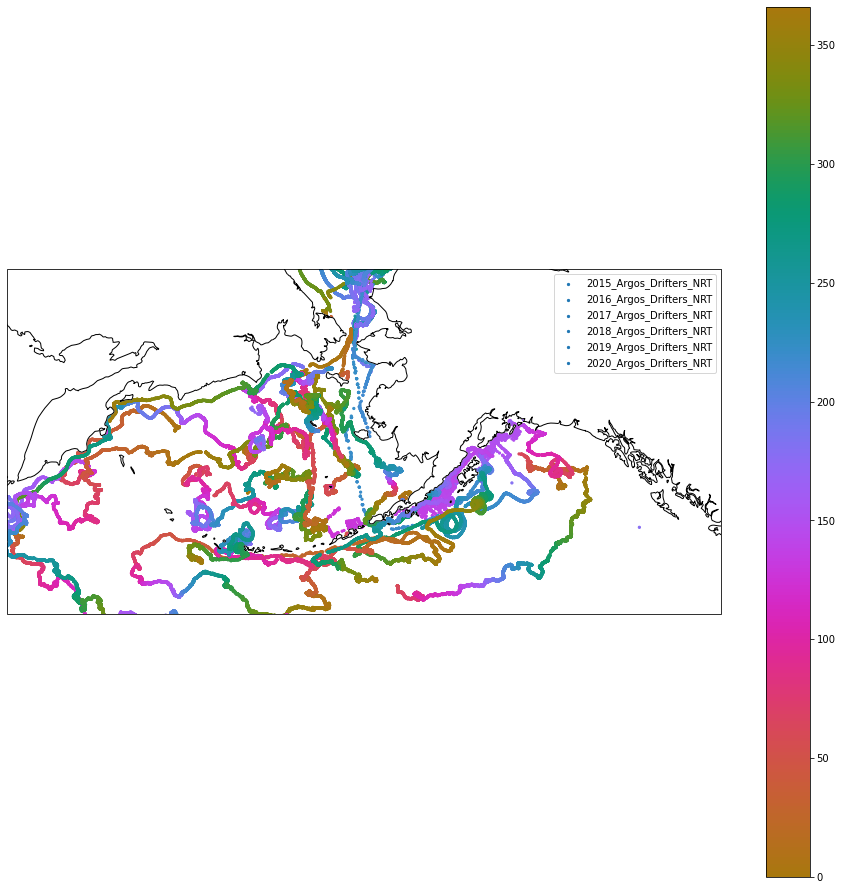

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 16),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax, plt

projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

dx = dy = 0.5
extent = -180, -130, kw['min_lat']+dy, kw['max_lat']+dy
extent = [-200, -130, 45, 66]
fig,ax,plt = make_map(projection=projection)


for arfloat, df in dfs_2.items():
    print(arfloat)
    #ax.plot(df['longitude'], df['latitude'], '.', markersize=0.5, label=float, transform=transformation)
    t = ax.scatter(df['longitude'], df['latitude'], s=5,c=df.index.dayofyear, cmap=cmocean.cm.phase, 
                   vmin=0, vmax=366, label=arfloat, transform=transformation)
   
plt.colorbar(t)
leg = ax.legend()

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

2015_Argos_Drifters_NRT
2016_Argos_Drifters_NRT
2017_Argos_Drifters_NRT
2018_Argos_Drifters_NRT
2019_Argos_Drifters_NRT
2020_Argos_Drifters_NRT


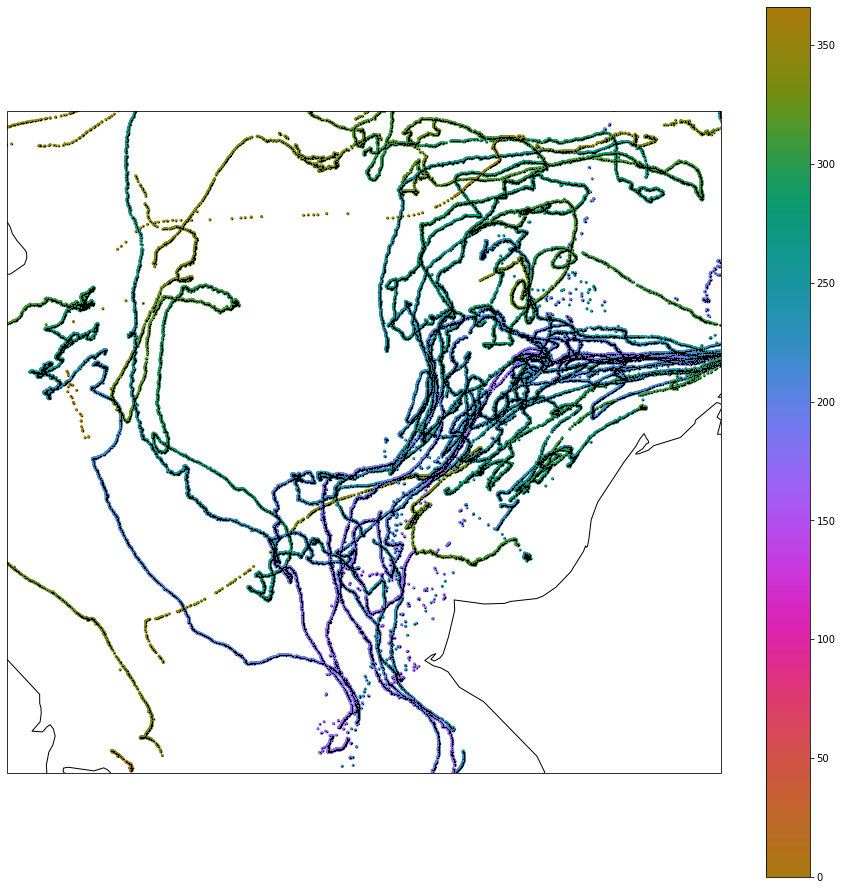

In [20]:

projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

dx = dy = 0.5
extent = [-176, -160, 67.5, 72.5]

fig,ax,plt = make_map(projection=projection)


for arfloat, df in dfs_2.items():
    print(arfloat)
    ax.plot(df['longitude'][0], df['latitude'][0], 'or', markersize=5., label=arfloat, transform=transformation)
    ax.plot(df['longitude'], df['latitude'], '+k', markersize=0.5, label=arfloat, transform=transformation)
    t = ax.scatter(df['longitude'], df['latitude'], s=5,c=df.index.dayofyear, cmap=cmocean.cm.phase, 
                   vmin=0, vmax=366, label=arfloat, transform=transformation)

plt.colorbar(t)
#leg = ax.legend()

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

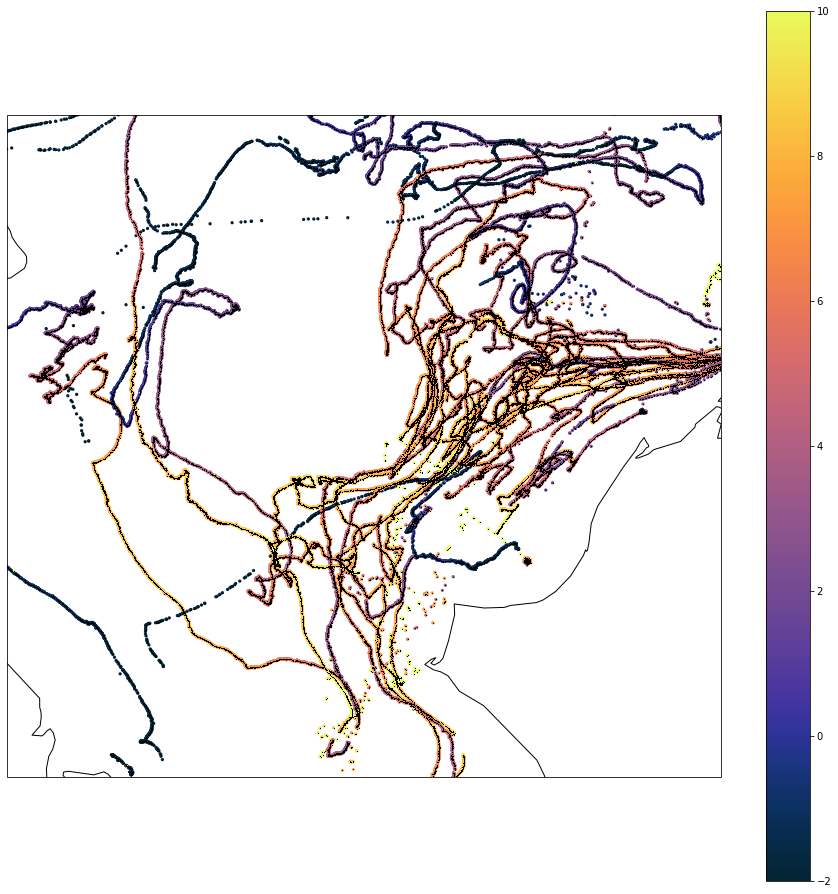

In [22]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

dx = dy = 0.5
extent = [-176, -160, 67.5, 72.5]

fig,ax,plt = make_map(projection=projection)

for arfloat, df in dfs_2.items():
    #ax.scatter(df_sub['longitude'], df_sub['latitude'], s=5, color='r', label=alamo, transform=transformation)
    ax.plot(df['longitude'], df['latitude'], '+k', markersize=0.5, label=arfloat, transform=transformation)
    t = ax.scatter(df['longitude'], df['latitude'], 
                   s=5,c=df.sst, cmap=cmocean.cm.thermal, 
                   vmin=-2, vmax=10, label=arfloat, transform=transformation)

plt.colorbar(t)
#leg = ax.legend()

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

# Using Python-GMT

In [23]:
import pygmt as gmt

In [24]:
fig = gmt.Figure()

fig.coast(region=[-175, -145, 65, 75], projection='B-160/60/55/60/6i', land='lightgray', water='gray',
          frame=True,U=True)

In [31]:
dfg = dfs_2['2018_Argos_Drifters_NRT'].groupby('trajectory_id')
dfg.groups.keys()

dict_keys(['136863_2018.nc', '136866_2018.nc', '136867_2018.nc', '136868_2018.nc', '139910_2018.nc', '139911_2018.nc', '139912_2018.nc', '139913_2018.nc', '139914_2018.nc', '139915_2018.nc', '145469_2018.nc', '145473_2018.nc', '145474_2018.nc', '145480_2018.nc', '148276_2018.nc'])

In [32]:
#color by id for one year
clist=['red','lightblue','blue','green','cyan','yellow','orange','lightred','lightgray',
      'black','lightgreen','lightyellow','brown','darkgray','darkred','darkblue']
count=0
for traj in dfg.groups.keys():
    fig.plot(x=dfg.get_group(traj).longitude, y=dfg.get_group(traj).latitude, color=clist[count], style='p0.05')
    print(clist[count])
    count+=1

red
lightblue
blue
green
cyan
yellow
orange
lightred
lightgray
black
lightgreen
lightyellow
brown
darkgray
darkred


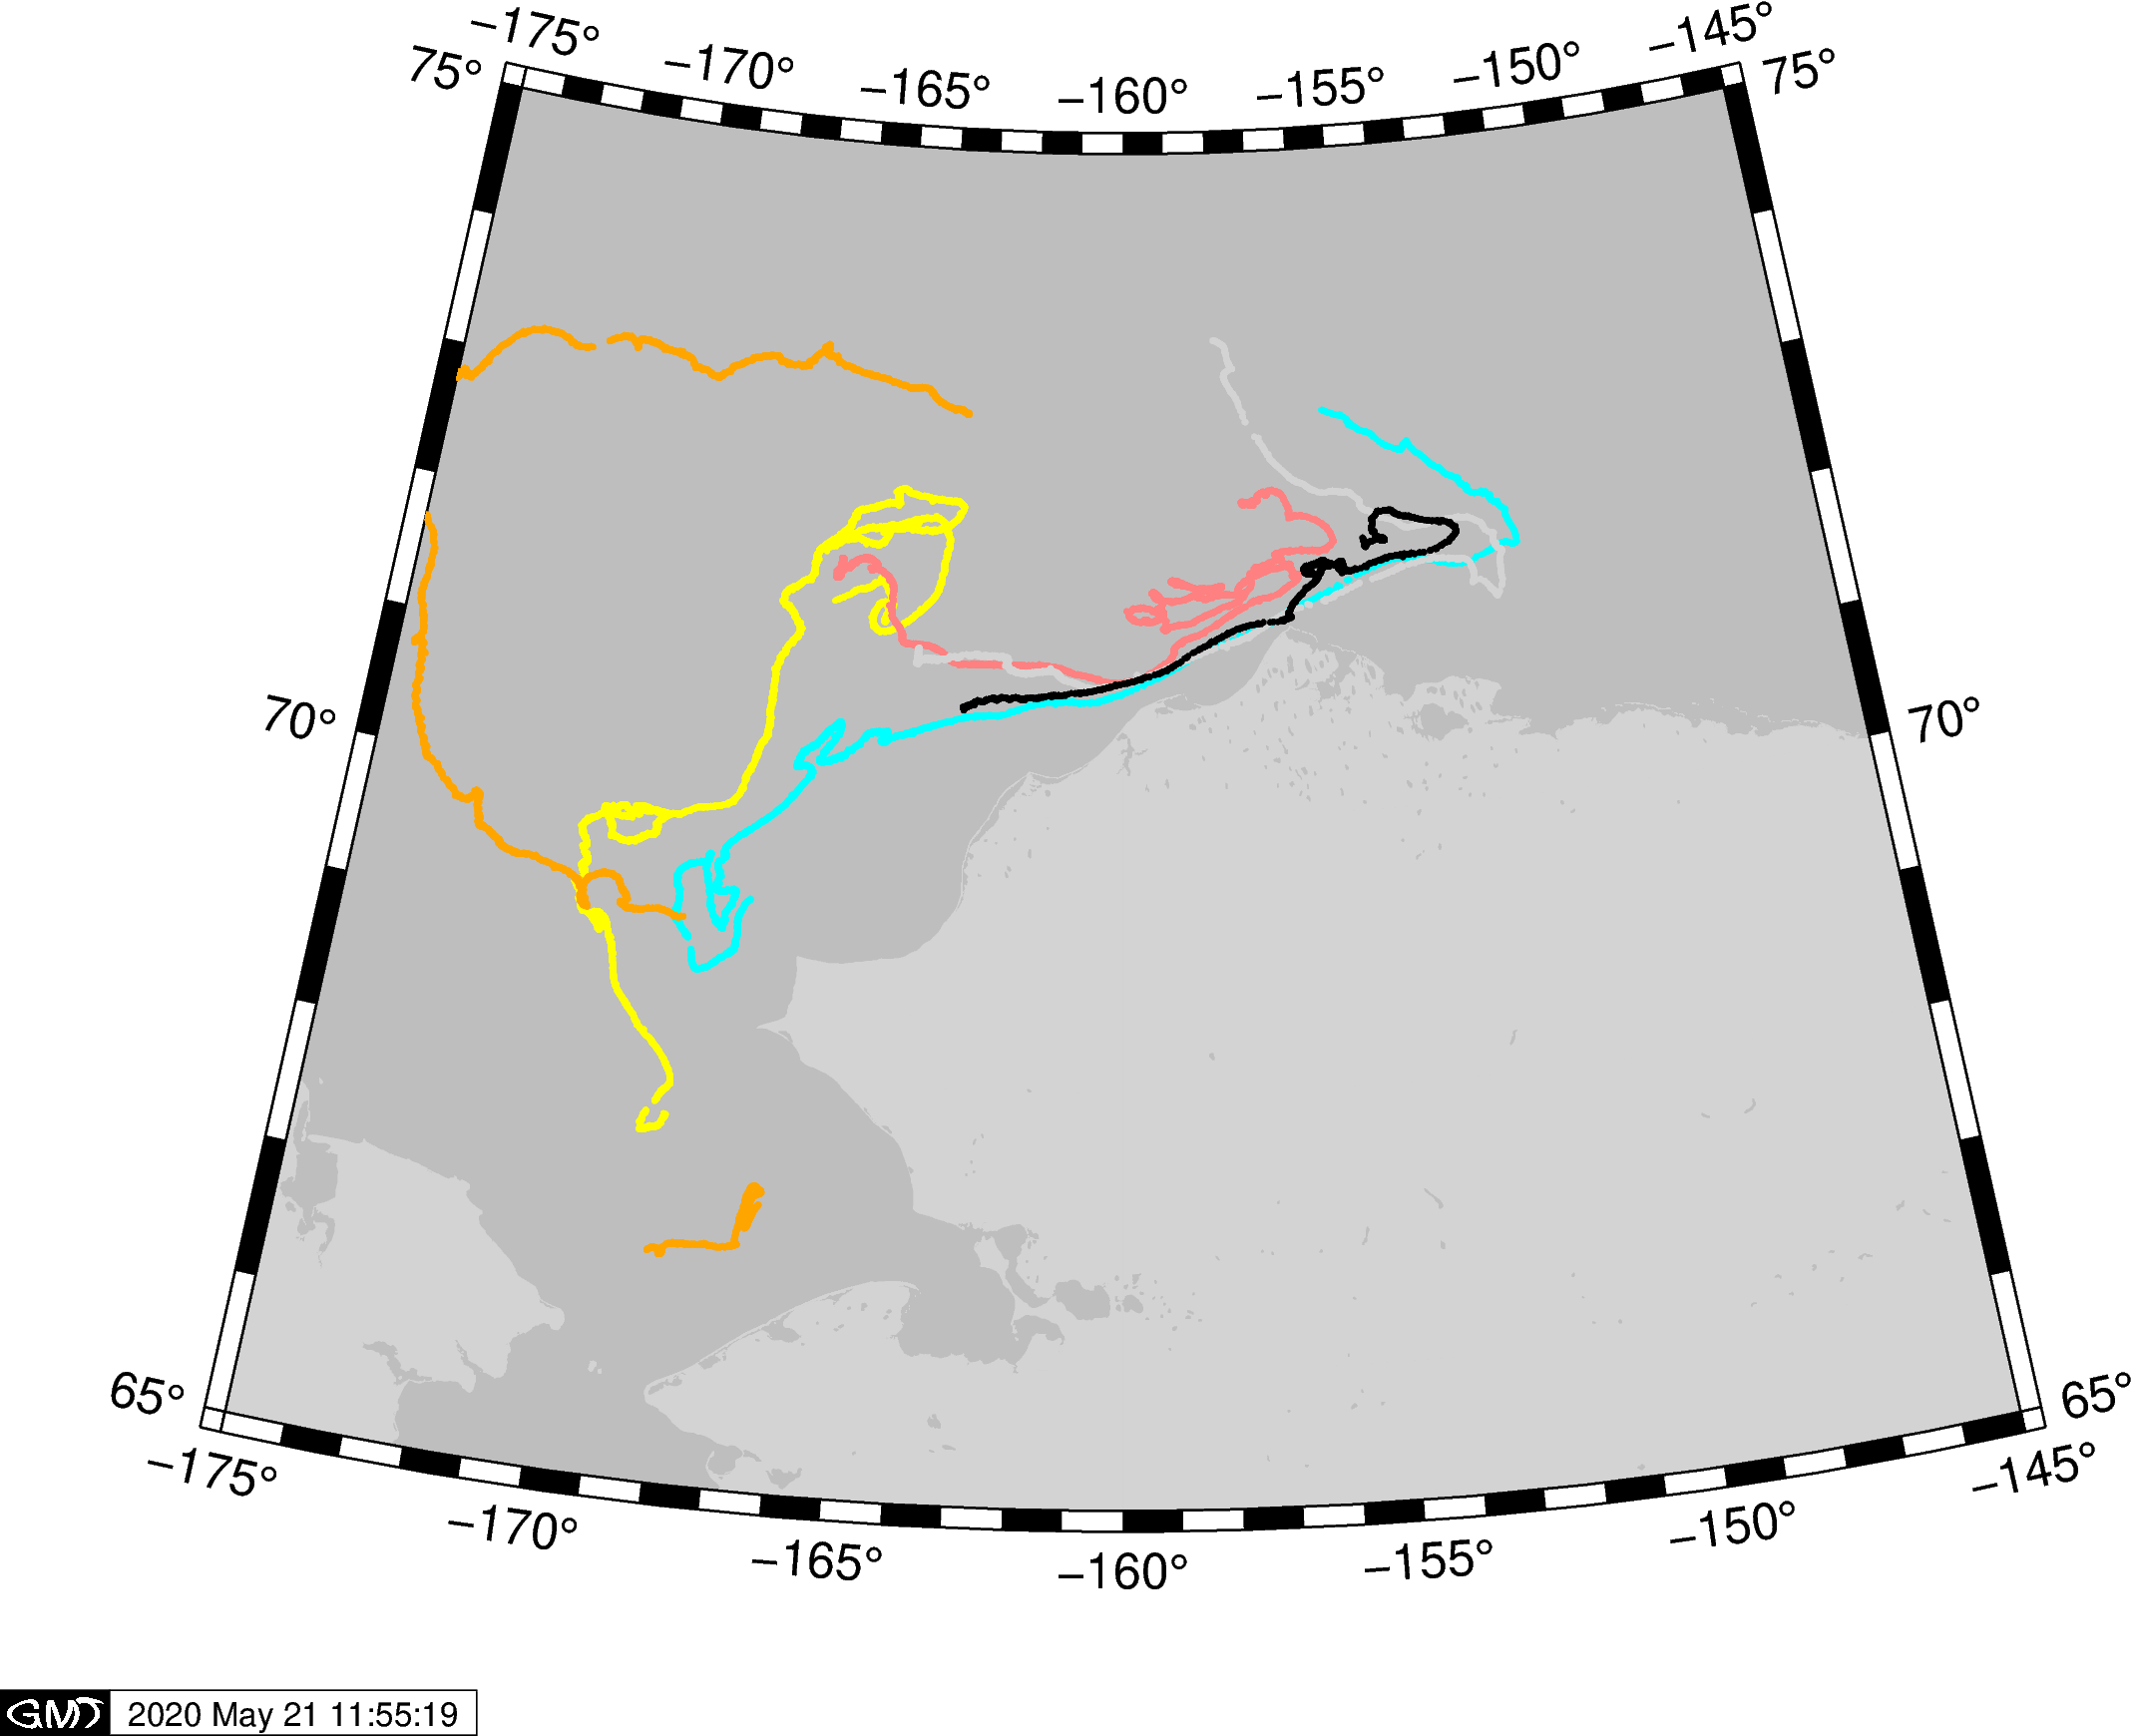

In [33]:
fig.show()

In [34]:
fig1 = gmt.Figure()
fig1.coast(region=[-175, -145, 65, 75], projection='B-160/60/55/60/6i', land='lightgray', water='gray',
          frame=True,U=True)

fig1b = gmt.Figure()
fig1b.coast(region=[-185, -160, 50, 65], projection='B-172.5/60/55/60/6i', land='lightgray', water='gray',
          frame=True,U=True)

## Colorbars for plots

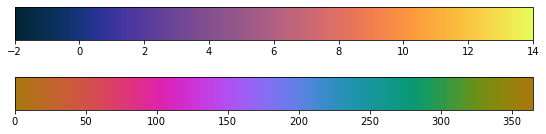

In [37]:
# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = cmocean.cm.thermal
norm = mpl.colors.Normalize(vmin=-2, vmax=14)

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

cmap = cmocean.cm.phase
norm = mpl.colors.Normalize(vmin=0, vmax=365)

cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')